In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(42)

In [2]:
def relu(x):
    x[x<0]=0
    return x

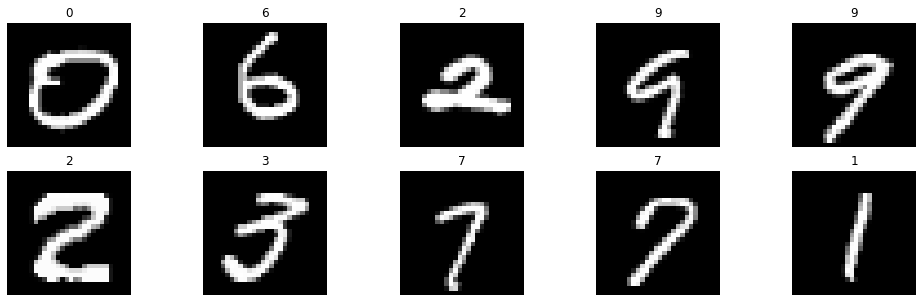

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")

X_train = train_data.drop(columns=['label']).values/255
y_train = train_data['label'].values

plt.rcParams['figure.figsize'] = (17,5)
fig, ax=plt.subplots(2,5)
ax = ax.flatten()
ix = np.random.randint(0,42000,size=10)
for i in range(10):
    ax[i].imshow(X_train[ix[i],:].reshape(28,28), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(str(int(y_train[ix[i]])))
plt.show()

In [4]:
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
K=np.size(np.unique(y_train))
y_train_cat = (y_train[:,np.newaxis] == np.arange(K))

X_test = test_data.values/255
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))      

In [5]:
numEpochs = 5000 
numHidden = 257
eta = 1.32
numPatterns = X_train.shape[0]
numPixels = X_train.shape[1]

Wh=0.1*np.random.randn(numPixels,numHidden)
wo=0.1*np.random.randn(numHidden+1, K)

loss=np.zeros((numEpochs,1))
accuracy=np.zeros((numEpochs,1))

In [6]:
for i in tqdm(range(numEpochs)):
    zh=np.matmul(X_train,Wh)
    phi=np.hstack((np.ones((X_train.shape[0],1)),relu(zh))) 
    s=np.exp(np.matmul(phi,wo))
    y_pred_cat=s/np.sum(s,axis=1).reshape(-1,1)
    err=y_pred_cat-y_train_cat
    dWh = np.matmul(X_train.transpose(),(np.matmul(err,wo[1:numHidden+1,:].transpose()))*(zh>0))
    dwo = np.matmul(phi.transpose(),err)
    Wh=Wh-eta/numPatterns*dWh
    wo=wo-eta/numPatterns*dwo
    loss[i,0]=-np.mean((np.log(y_pred_cat)*y_train_cat).sum(axis=1))
    y_pred=np.argmax(y_pred_cat, axis=1)
    accuracy[i,0]=100*np.mean(y_pred==y_train)  

100%|████████████████████████████████████| 5000/5000 [1:00:33<00:00,  1.53it/s]


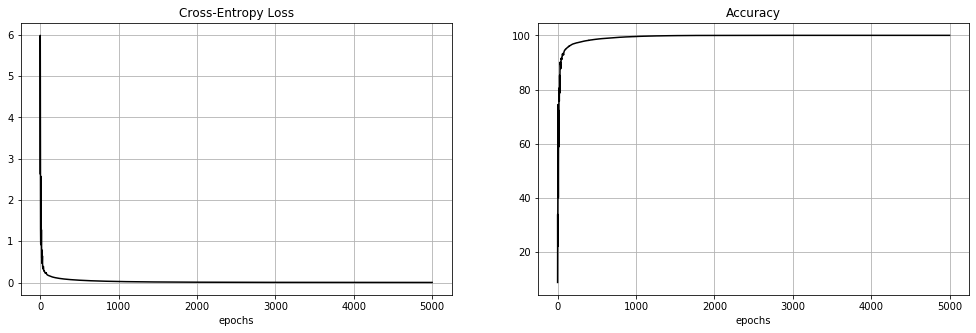

In [7]:
plt.rcParams['figure.figsize'] = (17,5)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(range(numEpochs),loss,'-',color='k',markersize=2)
ax[0].set_title("Cross-Entropy Loss")
ax[0].set_xlabel("epochs")
ax[0].grid()
ax[1].plot(range(numEpochs),accuracy,'-',color='k',markersize=2)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("epochs")
ax[1].grid()
plt.show()

In [8]:
print("Cross-entropy Loss: %4.4f" % loss[-1])
print("Training Accuracy: %4.2f%%" % accuracy[-1])

Cross-entropy Loss: 0.0017
Training Accuracy: 100.00%


In [9]:
zh=np.matmul(X_test,Wh)
phi=np.hstack((np.ones((X_test.shape[0],1)),relu(zh))) 
s=np.exp(np.matmul(phi,wo))
y_pred_cat=s/np.sum(s,axis=1).reshape(-1,1)
y_pred=np.argmax(y_pred_cat, axis=1)

submission = pd.DataFrame({'ImageId': range(1,len(X_test)+1) ,'Label': y_pred})
submission.to_csv("y_pred.csv",index=False)